In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import newaxis
from PIL import Image 
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
import os

from sklearn.model_selection import train_test_split
from skimage.transform import resize

from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from tqdm import tqdm_notebook, tnrange
from itertools import chain
from sklearn.model_selection import train_test_split

In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


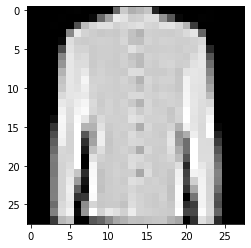

Label: 6


In [5]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [3]:
def contraction(self,X,filters,kernel_size=(5,5),strides=(1,1),padding="same",activation="relu"):
        c=tf.keras.layers.Conv2D(filters, kernel_size, strides=strides, padding=padding, activation=activation)(X)
        c=tf.keras.layers.Conv2D(filters, kernel_size, strides=strides, padding=padding, activation=activation)(c)
        p=tf.keras.layers.MaxPool2D((2, 2), (2, 2))(c)
        return c, p
    
def bottom(self,X,filters,kernel_size=(5,5),strides=(1,1),padding="same",activation="relu"):
        c=tf.keras.layers.Conv2D(filters, kernel_size, strides=strides, padding=padding, activation=activation)(X)
        c=tf.keras.layers.Conv2D(filters, kernel_size, strides=strides, padding=padding, activation=activation)(c)
        return c
    
def expansion(self,X,skip,filters,kernel_size=(5,5),strides=(1,1),padding="same",activation="relu"):
        us=tf.keras.layers.UpSampling2D((2, 2))(X)
        concat=tf.keras.layers.Concatenate()([us,skip])
        c=tf.keras.layers.Conv2D(filters, kernel_size, strides=strides, padding=padding, activation=activation)(concat)
        c=tf.keras.layers.Conv2D(filters, kernel_size, strides=strides, padding=padding, activation=activation)(c)
        return c